<center><h1 style="font-family: 'Inria Serif'; font-size:38px">Shri Ramdeobaba College of Engineering and Management<br>Nagpur 440013</h1></center>
<center><h1 style="font-family: 'Inria Serif'; font-size:38px">Department of Computer Science Engineering (AIML)</h1></center>
<center><h2 style="font-family: 'Inria Serif'; font-size:32px">Data Analysis and Visualization Lab - Practical 6</h2></center>

<br>
<br>
<div class="text aim" style="font-family: 'Inria Serif'; font-size:22px">Name : Pratik Agrawal</div>
<div class="text aim" style="font-family: 'Inria Serif'; font-size:22px">Class : CSE AIML E4</div>
<div class="text aim" style="font-family: 'Inria Serif'; font-size:22px">Roll No : 57</div>
<hr style="border:0px" />
<br/>
<div class="text aim" style="font-family: 'Inria Serif'; font-size:28px">Aim : Write a program to perform Chi-square Test statistical test using user defined functions. Use `smoking.csv` dataset data set to perform above tests using user defined functions. Verify the results obtained  with standard functions.
</div>

<div class="text" style="font-family: 'Inria Serif'; font-size:28px"></div>

## <div class="text" style="font-family: 'Inria Serif'; font-size:28px">Import Libraries</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
sns.set(style='darkgrid')
from scipy.stats import chi2,chi2_contingency

## <div class="text" style="font-family: 'Inria Serif'; font-size:28px">Load Dataset</div>

In [4]:
# Load the smoking dataset
df = pd.read_csv("smoking.csv")
df.head()

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [5]:
df.isna().sum()

Unnamed: 0                  0
gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64

In [6]:
#missing values
df.isnull().sum().values.sum()

3810

In [8]:
df.nunique()

Unnamed: 0               1691
gender                      2
age                        79
marital_status              5
highest_qualification       8
nationality                 8
ethnicity                   7
gross_income               10
region                      7
smoke                       2
amt_weekends               24
amt_weekdays               24
type                        4
dtype: int64

In [20]:
df.columns.tolist()

['Unnamed: 0',
 'gender',
 'age',
 'marital_status',
 'highest_qualification',
 'nationality',
 'ethnicity',
 'gross_income',
 'region',
 'smoke',
 'amt_weekends',
 'amt_weekdays',
 'type']

In [10]:
df.describe()

,Unnamed: 0,age,amt_weekends,amt_weekdays
count,1691.000000,1691.000000,421.000000,421.000000
mean,846.000000,49.836192,16.410926,13.750594
std,488.293969,18.736851,9.892988,9.388292
min,1.000000,16.000000,0.000000,0.000000
25%,423.500000,34.000000,10.000000,7.000000
50%,846.000000,48.000000,15.000000,12.000000
75%,1268.500000,65.500000,20.000000,20.000000
max,1691.000000,97.000000,60.000000,55.000000


In [17]:
def dist_box(data):
    Name = data.name.upper()
    fig, (ax_box, ax_dis)= plt.subplots(2, 1, gridspec_kw={"height_ratios":(.25,.75)})
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR "+ Name, fontsize=18,fontweight='bold')
    sns.boxplot(x=data, showmeans =True, orient='h',color='lightgreen',ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(data, kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean,color='r',linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g',linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
                                                           


C:\Users\rujut\AppData\Local\Temp\ipykernel_22312\1507287936.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=False,color='blue',ax=ax_dis)
C:\Users\rujut\AppData\Local\Temp\ipykernel_22312\1507287936.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=False,color='blue'

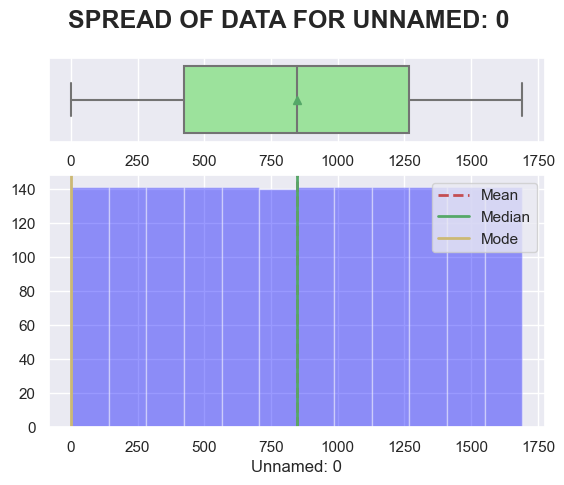

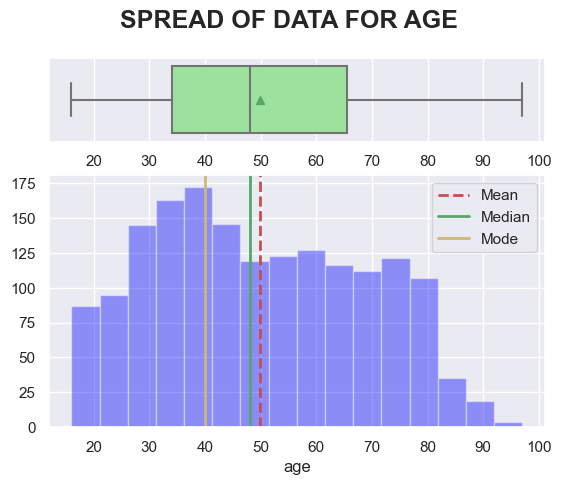

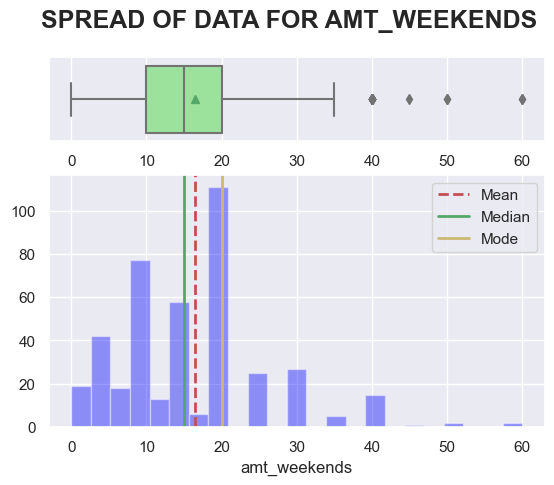

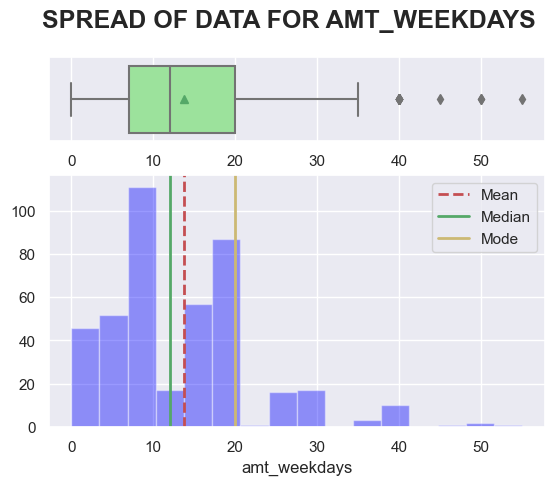

In [18]:
list_col = df.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

In [19]:
def bar_perc(plot,feature):
    total=len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2-0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage,(x,y),size=12)

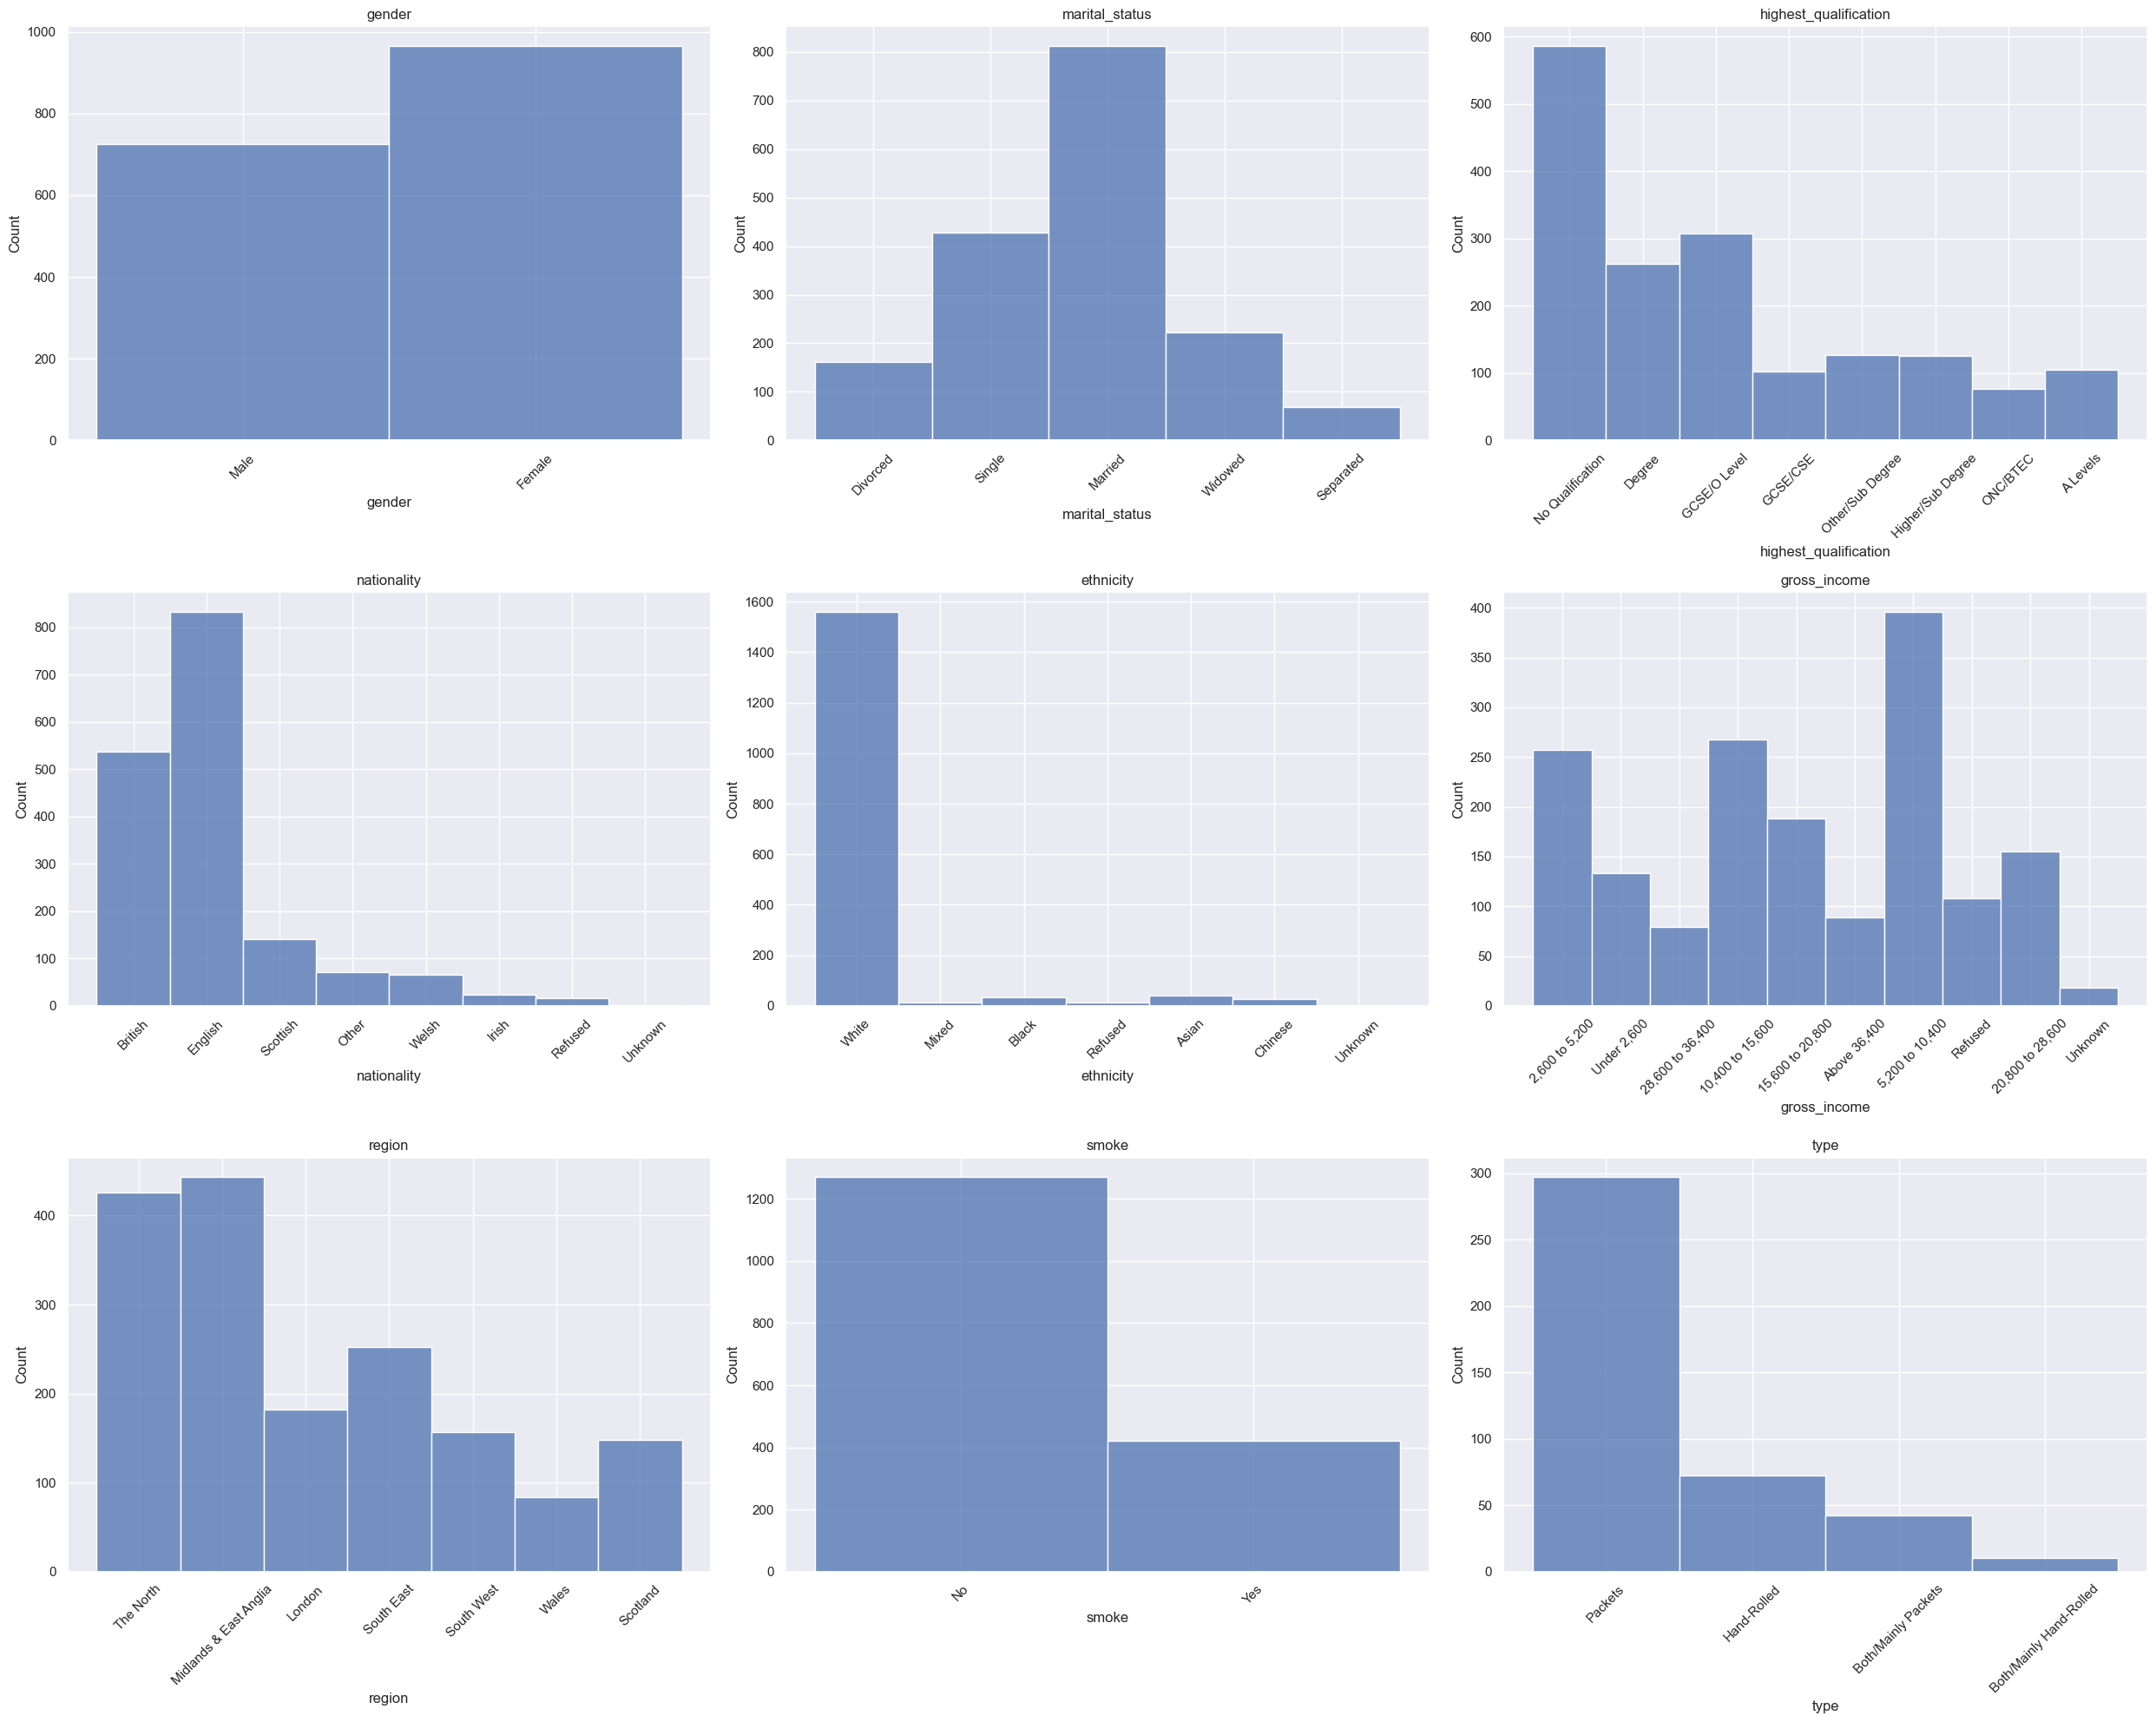

In [21]:
list_col=['gender', 'marital_status', 'highest_qualification','nationality', 'ethnicity', 'gross_income', 'region', 'smoke', 'type']
plt.figure(figsize=(25,20))
for i in range(len(list_col)):
    plt.subplot(3,3,i+1)
    plt.title(list_col[i])
    sns.histplot(data=df,x=df[list_col[i]])
    sns.set(font_scale=1)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\rujut\AppData\Local\Temp\ipykernel_22312\3947244728.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='icefire')


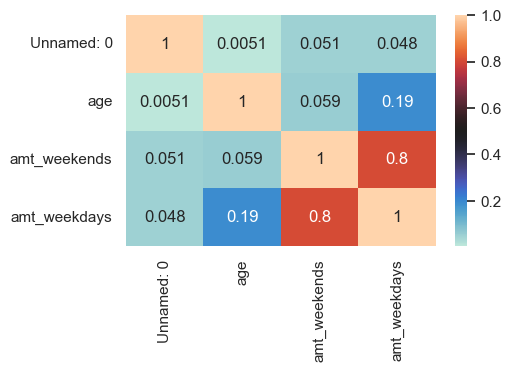

In [22]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(),annot=True,cmap='icefire')
plt.show()

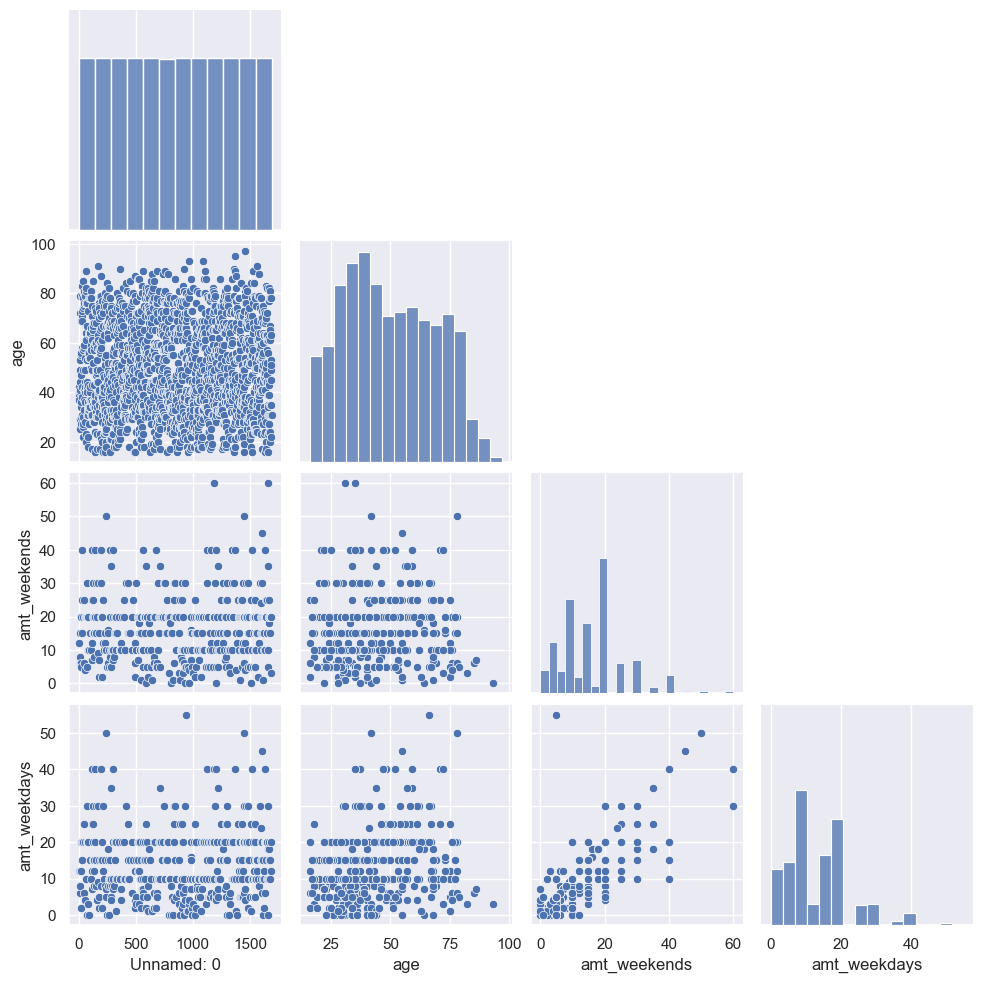

In [23]:
sns.pairplot(data=df,corner=True)
plt.show()

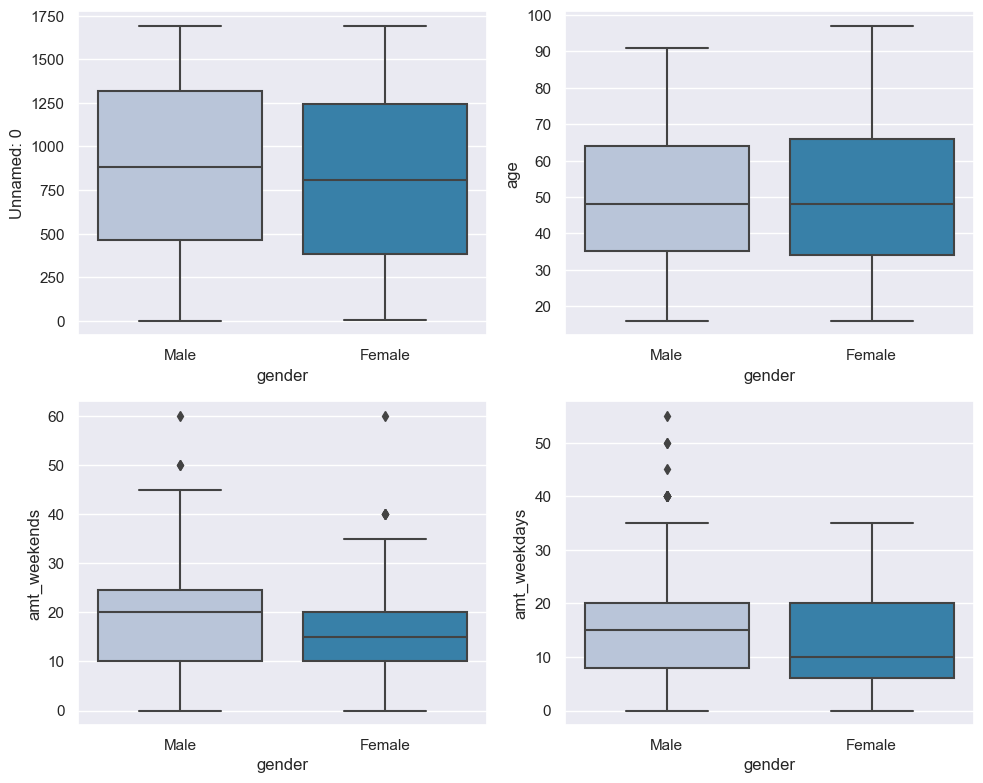

In [24]:
fig1,axes1 = plt.subplots(2,2,figsize=(10,8))
list_col= df.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col = i % 2
    ax = axes1[row,col]
    sns.boxplot(y=df[list_col[i]],x=df['gender'],ax=ax,palette = "PuBu",orient='v')
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Smoker vs Gender')]

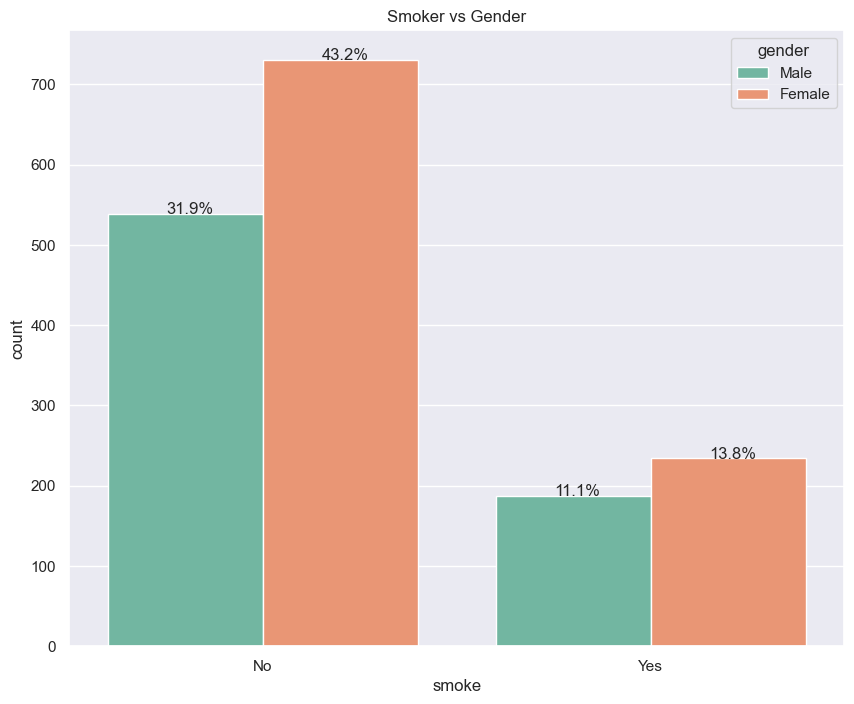

In [25]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='smoke',hue='gender',data=df,palette='Set2')
bar_perc(ax,df['gender'])
ax.set(title="Smoker vs Gender")

[Text(0.5, 1.0, 'Smoker vs marital_status')]

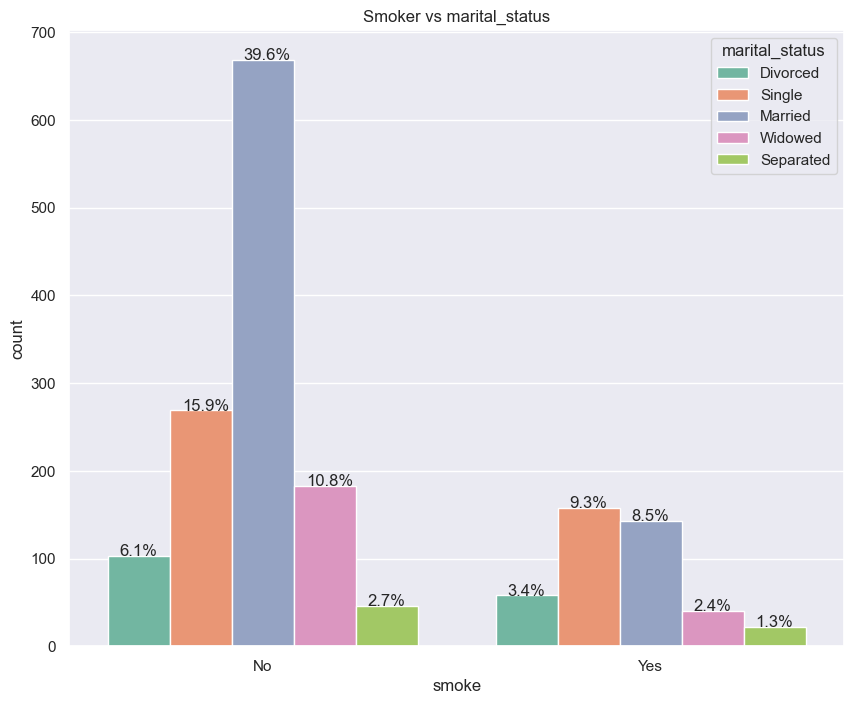

In [26]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='smoke',hue='marital_status',data=df,palette='Set2')
bar_perc(ax,df['marital_status'])
ax.set(title="Smoker vs marital_status")

[Text(0.5, 1.0, 'Smoker vs nationality')]

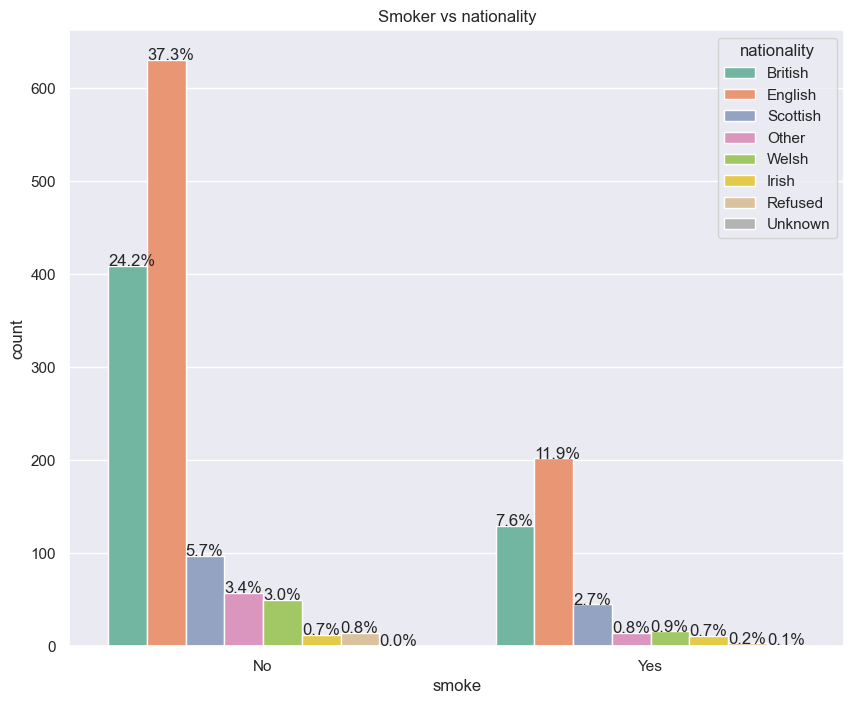

In [27]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='smoke',hue='nationality',data=df,palette='Set2')
bar_perc(ax,df['nationality'])
ax.set(title="Smoker vs nationality")

[Text(0.5, 1.0, 'Smoker vs region')]

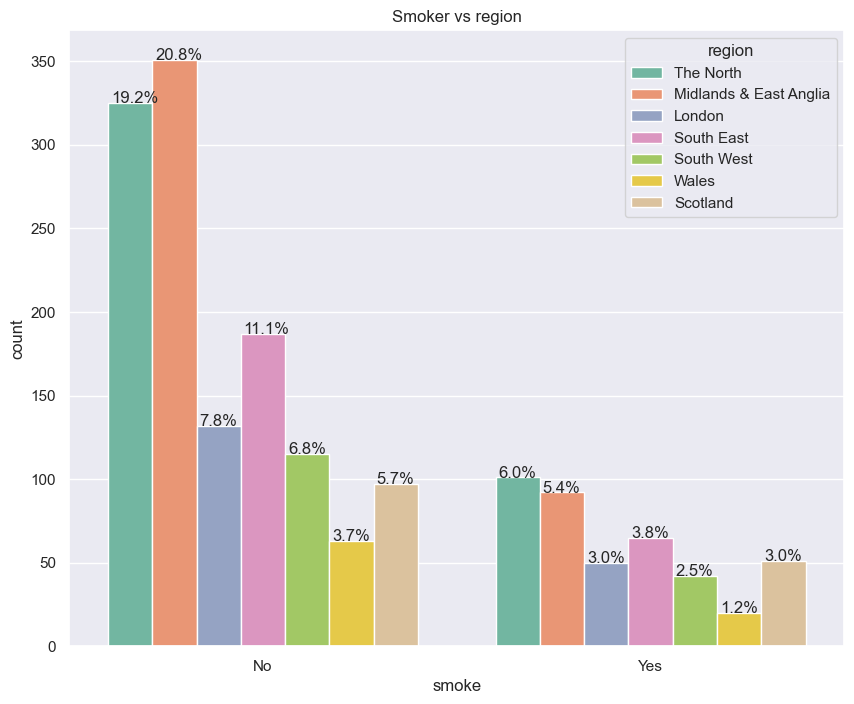

In [28]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='smoke',hue='region',data=df,palette='Set2')
bar_perc(ax,df['region'])
ax.set(title="Smoker vs region")

In [ ]:
#chi sq test

In [29]:
contingency_table = pd.crosstab(df["gender"],df["smoke"])
print('contingency_table:-\n',contingency_table)


contingency_table:-
 smoke    No  Yes
gender          
Female  731  234
Male    539  187


In [30]:
observed_val = contingency_table.values
print("observed_val:-\n",observed_val)

observed_val:-
 [[731 234]
 [539 187]]


In [31]:
b = stats.chi2_contingency(contingency_table)
expected_val = b[3]
print("Expected values:-\n",expected_val)

Expected values:-
 [[724.74866943 240.25133057]
 [545.25133057 180.74866943]]


In [32]:
rows= len(contingency_table.iloc[0:2,0])
cols = len(contingency_table.iloc[0,0:2])
df = (rows-1)*(cols-1)
print("Degree of freedom:-",df)

Degree of freedom:- 1


In [33]:
alpha=0.05
chi_sq = sum([(o-e)**2./e for o,e in zip(observed_val,expected_val)])
chi_sq_statistic=chi_sq[0]+chi_sq[1]
print("chi_sq_statistic:",chi_sq_statistic)

chi_sq_statistic: 0.5044591484173093


In [34]:
#critical val
critical_val=chi2.ppf(q=1-alpha,df=df)
print("critical_val:",critical_val)

critical_val: 3.841458820694124


In [37]:
#pval
p_value = 1-chi2.cdf(x=chi_sq_statistic,df=df)
print('p-value:',p_value)

p-value: 0.4775473364084263


In [38]:
print('Significance level:',alpha)
print('DOF:',df)
print('chi_sq_statistic:',chi_sq_statistic)
print("critical_val:",critical_val)
print('p-value:',p_value)

Significance level: 0.05
DOF: 1
chi_sq_statistic: 0.5044591484173093
critical_val: 3.841458820694124
p-value: 0.4775473364084263


#define null and alternate hypo
HO:μ1=μ2 There are not any difference in smoking between Female and Male
H1:μ1<μ2 or μ1>μ2 There are any difference in smoking between Female and Male
If P values is less than alpha reject the null hypothesis, a = 0.05
Identify gender is norminal varialble. So The Chi-Squre test is one of the good options to prove. The Chi-Square test is a statistical procedure for determining the difference between observed and expected data. This test can also be used to determine whether it correlates to the categorical variables in our data. It helps to find out whether a difference between two categorical variables is due to chance or a relationship between them

In [39]:
if chi_sq_statistic >= critical_val:
    print("Reject H0, there are not any diff in smoking bet Female and Male")
else:
    print("Retain H0, there are not any diff in smoking bet Female and Male")
    
if p_value<=alpha:
    print("Reject H0, there are not any diff in smoking bet Female and Male")
else:
    print("Retain H0, there are not any diff in smoking bet Female and Male")
    

Retain H0, there are not any diff in smoking bet Female and Male
Retain H0, there are not any diff in smoking bet Female and Male
